In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
os.chdir('/content/drive/MyDrive/CML-project1-csvs')

In [ ]:
import pandas as pd

In [ ]:
def print_flops_for_dataframe(columns):
  subsetted_dataframe=columns[["dram__bytes_read.sum", "dram__bytes_write.sum", "gpu__time_duration.sum", "smsp__sass_thread_inst_executed_op_ffma_pred_on.sum", "smsp__sass_thread_inst_executed_op_fmul_pred_on.sum", "smsp__sass_thread_inst_executed_op_fadd_pred_on.sum"]]
  subsetted_dataframe=subsetted_dataframe.iloc[1:,:]
  for col in subsetted_dataframe.columns:
      subsetted_dataframe[col] = subsetted_dataframe[col].str.strip().str.replace(',', '').astype(float)
  flops=(2*subsetted_dataframe['smsp__sass_thread_inst_executed_op_ffma_pred_on.sum']) + subsetted_dataframe['smsp__sass_thread_inst_executed_op_fmul_pred_on.sum'] + subsetted_dataframe['smsp__sass_thread_inst_executed_op_fadd_pred_on.sum']
  flops=flops.sum()
  print("flops.sum:",flops)
  time = (subsetted_dataframe['gpu__time_duration.sum'].sum())/1000000000
  print("time in secs:",time)
  total_bytes = (subsetted_dataframe['dram__bytes_read.sum'] + subsetted_dataframe['dram__bytes_write.sum']).sum()
  print("total_bytes:",total_bytes)
  OI=flops/total_bytes
  print("OI:",OI)
  Flop_sec = flops/time
  print("Flops/sec:",Flop_sec)


In [ ]:
dataframe=pd.read_csv("vgg16-v100.csv")
print_flops_for_dataframe(dataframe)

flops.sum: 50718112163.0
time in secs: 0.009581056
total_bytes: 3171750848.0
OI: 15.990572587055867
Flops/sec: 5293582686814.481


In [ ]:
dataframe=pd.read_csv("vgg11-a100.csv")
print_flops_for_dataframe(dataframe)

flops.sum: 2920565417.0
time in secs: 0.003714432
total_bytes: 1989690880.0
OI: 1.467848823330788
Flops/sec: 786275106665.0298


In [ ]:
dataframe=pd.read_csv("alexnet-v100.csv")
print_flops_for_dataframe(dataframe)

flops.sum: 4117546463.0
time in secs: 0.002397472
total_bytes: 839343936.0
OI: 4.905672497763777
Flops/sec: 1717453410509.0696


In [ ]:
dataframe=pd.read_csv("alexnet-a100.csv")
print_flops_for_dataframe(dataframe)

flops.sum: 1392806057.0
time in secs: 0.001568768
total_bytes: 735346944.0
OI: 1.8940801595280716
Flops/sec: 887834311383.2001


In [ ]:
dataframe=pd.read_csv("resnet18-v100.csv")
print_flops_for_dataframe(dataframe)

flops.sum: 8297434213.0
time in secs: 0.005030304
total_bytes: 484320736.0
OI: 17.13210605337369
Flops/sec: 1649489615935.7366


In [ ]:
dataframe=pd.read_csv("resnet18-a100.csv")
print_flops_for_dataframe(dataframe)

flops.sum: 1214372889.0
time in secs: 0.003620512
total_bytes: 383364864.0
OI: 3.1676687225045224
Flops/sec: 335414684166.21735


['(12.54,19.5)', '(3.167,0.3353)', '(1.89,0.887)']


<Figure size 640x480 with 0 Axes>

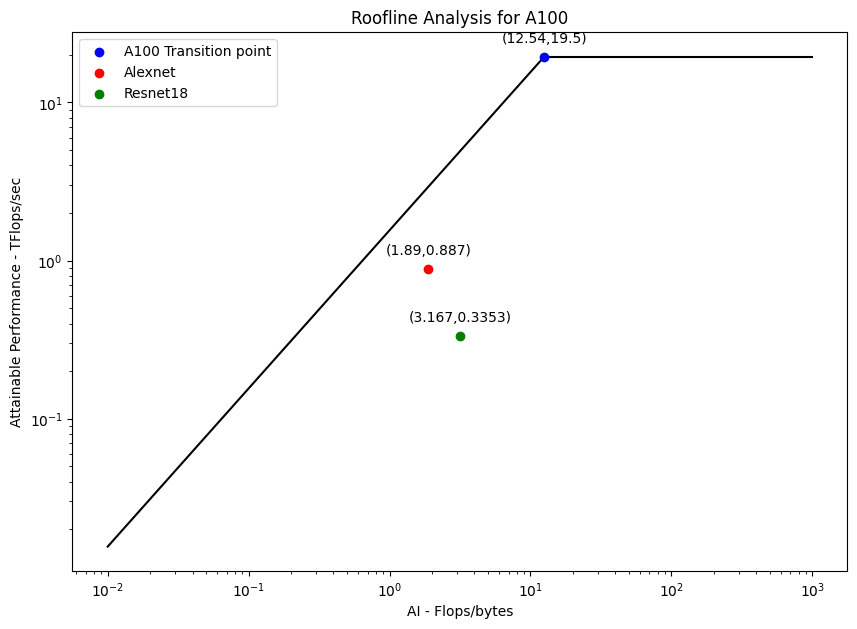

In [56]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.linspace(0.01, 12.54, 500)  # Avoid starting from 0 to allow log scale
x2 = np.linspace(12.54, 1000, 500)  # You can adjust the upper limit as needed

# Define the y values based on the given equations
y1 = 19.5/12.54 * x1
y2 = np.full_like(x2, 19.5)

# Plot the curve
plt.figure()
plt.figure(figsize=(10, 7))
plt.plot(x1, y1,color='black')
plt.plot(x2, y2, color='black')

x11= [12.54,3.167,1.89]
y11 = [19.5, 0.3353,0.887]

labels =[]

for i in range(len(x11)):
  labels.append("("+str(x11[i])+","+str(y11[i])+")")

print(labels)

plt.scatter(12.54, 19.5, color='blue', zorder=5, label='A100 Transition point')

# Alexnet
plt.scatter(1.89, 0.887 , color='red', zorder=5, label='Alexnet')

# Resnet
plt.scatter(3.167, 0.3353, color='green', zorder=5, label='Resnet18')

for i, label in enumerate(labels):
    plt.annotate(label, (x11[i], y11[i]), textcoords="offset points", xytext=(0,10), ha='center')


# The point to plot for Resnet18 { }
# The point to plot for Alexnet {4.9, 0.99 }

# Set log scale for both axes
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel('AI - Flops/bytes')
plt.ylabel('Attainable Performance - TFlops/sec')
plt.title('Roofline Analysis for A100')
plt.legend()

# Show the plot
plt.show()

['(17.44,15.7)', '(4.9,1.71)', '(17.13,1.6)']


<Figure size 640x480 with 0 Axes>

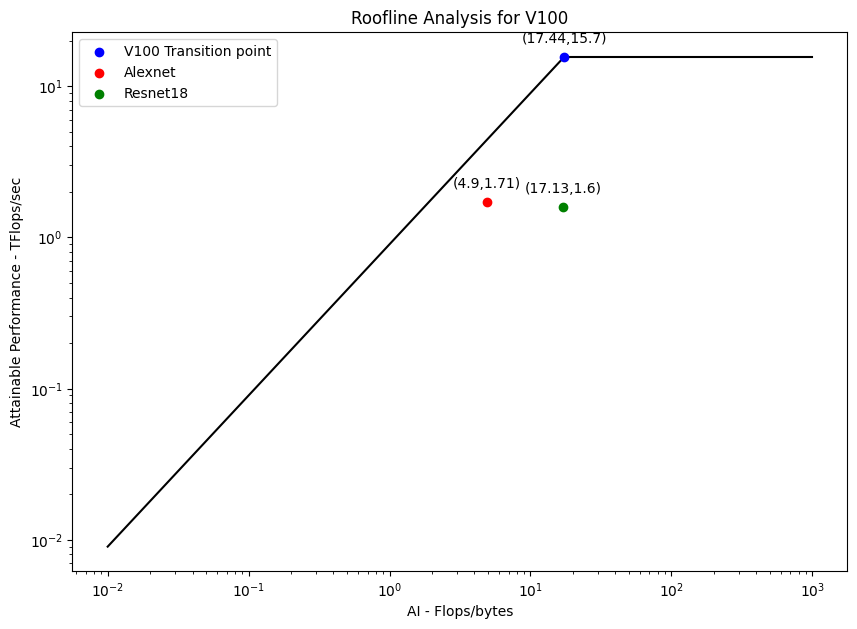

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Define the x values for the two segments of the curve
x1 = np.linspace(0.01, 17.44, 500)  # Avoid starting from 0 to allow log scale
x2 = np.linspace(17.44, 1000, 500)  # You can adjust the upper limit as needed

# Define the y values based on the given equations
y1 = 15.7/17.44 * x1
y2 = np.full_like(x2, 15.7)

# Plot the curve
plt.figure()
plt.figure(figsize=(10, 7))
plt.plot(x1, y1,color='black')
plt.plot(x2, y2, color='black')

x11= [17.44,4.9, 17.13]
y11 = [15.7, 1.71, 1.6]

labels =[]

for i in range(len(x11)):
  labels.append("("+str(x11[i])+","+str(y11[i])+")")

print(labels)

plt.scatter(17.44, 15.7, color='blue', zorder=5, label='V100 Transition point')

# Alexnet
plt.scatter(4.9,1.71 , color='red', zorder=5, label='Alexnet')

# Resnet
plt.scatter(17.13, 1.6, color='green', zorder=5, label='Resnet18')

for i, label in enumerate(labels):
    plt.annotate(label, (x11[i], y11[i]), textcoords="offset points", xytext=(0,10), ha='center')


# The point to plot for Resnet18 { }
# The point to plot for Alexnet {4.9, 0.99 }

# Set log scale for both axes
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel('AI - Flops/bytes')
plt.ylabel('Attainable Performance - TFlops/sec')
plt.title('Roofline Analysis for V100')
plt.legend()

# Show the plot
plt.show()